<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/banner-spectral.png" width="1000" align="middle"/>

---



# <font color='#ECA702'>**Hands-on Sesión 4: Breve introducción al desmezclado Espectral 🔍**</font>


# <font color='#4C5FDA'>**Objetivo**</font>


En teledetección, el espectro de un píxel se compone de más de un material, lo que se conoce como píxel "mixto". Por ejemplo, en la imagen siguiente (las líneas amarillas designan los píxeles), si midiéramos el espectro del píxel central, tendría firmas de árbol, hierba y arena. A menudo es útil conocer el porcentaje de cada material en cada píxel, lo que se denomina desmezcla hiperespectral.

<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture05.png" width="600" align="middle"/>

El objetivo del desmezclado hiperespectral es descomponer un cubo de imagen en las firmas espectrales puras que se encuentran en una escena (llamadas endmembers) y la cantidad (o proporción) de cada endmember que se encuentra en cada píxel. Las firmas espectrales puras son aquellas que sólo tienen UN material. Se trata de un análisis subpixel ya que estamos determinando cantidades subpixel de cada material en cada pixel.

Cuando se realiza unmixing hiperespectral, primero debemos asumir un modelo de mezcla particular.  

El modelo de mezcla más utilizado en la práctica es el *Modelo de Mezcla Lineal* (también conocido como *Modelo de Geometría Convexa*).  Aunque es el más utilizado, a menudo no se cumple en la práctica.

<img src="https://raw.githubusercontent.com/CristianR8/Imagenes-Espectrales-Sesion4-Parte1-HoCV/main/images/Picture07.png" align="middle"/>



Para esta sesión usaremos dos algoritmos que nos permitirán realizar el desmezcaldo espectral, a continuacion hablaremos de ellos.

# <font color='#ECA702'>**Pixel Purity Index (PPI)**</font>

<div style='text-align: justify;'>
    El Pixel Purity Index (PPI) es un algoritmo utilizado en el procesamiento de imágenes de teledetección, especialmente en el análisis de imágenes hiperespectrales, para identificar los píxeles más puros de un conjunto de datos. Estos píxeles puros representan firmas espectrales únicas que corresponden a materiales específicos presentes en la imagen. El algoritmo se basa en la proyección iterativa de los datos de la imagen sobre un plano generado aleatoriamente, identificando los píxeles que se proyectan a los extremos del espacio de datos como los más puros. Este proceso se repite múltiples veces, acumulando la frecuencia con la que cada píxel se identifica como puro. Los píxeles que se identifican con mayor frecuencia se consideran representativos de materiales únicos en la escena, y se pueden utilizar para la clasificación de la cobertura terrestre, la identificación de minerales, o el análisis de vegetación, entre otros.
</div>

# <font color='#ECA702'>**Fully Constrained Least Squares (FCLS)**</font>

<div style='text-align: justify;'>
    El Fully Constrained Least Squares (FCLS) es un algoritmo de desmezcla espectral utilizado en el análisis de imágenes hiperespectrales. Su objetivo es descomponer el espectro de un píxel mixto en las firmas espectrales de los componentes puros (endmembers) presentes en ese píxel, estimando la abundancia de cada componente. A diferencia de otros métodos de desmezcla, el FCLS incorpora dos restricciones importantes: las abundancias estimadas deben ser no negativas y la suma de todas las abundancias en un píxel debe ser igual a uno (conservación de la masa). Estas restricciones aseguran que las soluciones sean físicamente plausibles. El FCLS es ampliamente utilizado en aplicaciones de teledetección para cuantificar la cobertura y la composición de la superficie terrestre, como la identificación de tipos de vegetación, el mapeo de minerales, o la evaluación de la urbanización, proporcionando una herramienta valiosa para el análisis ambiental y de recursos naturales.
</div>

# <font color='#ECA702'>**Spectral Mixture Analysis by Penalized Constrained Least Squares (SPICE)**</font>


El algoritmo SPICE es una técnica de desmezcla espectral utilizada para determinar las proporciones de diferentes materiales presentes en los datos de imágenes hiperespectrales. Utiliza un enfoque de mínimos cuadrados penalizados y restringidos para descomponer el espectro medido de un píxel en una combinación de espectros de referencia conocidos, ajustándose a las restricciones físicas y estadísticas para obtener resultados más realistas y precisos.






Ahora procederemos a realizar la actividad de desmesclado espectral

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/noveno/Parte1 - Sesion1 - Imagenes Espectrales/Imagenes-espectrales-session")

In [3]:
!pip install loadmat
!pip install pysptools
!pip install quadprog



ERROR: Could not find a version that satisfies the requirement loadmat (from versions: none)
ERROR: No matching distribution found for loadmat
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133736 sha256=f3dc72f80e3735088d813ea3dc7806e0e7f97f1ce8d56302b99aa6da0a17efec
  Stored in directory: /root/.cache/pip/wheels/ea/08/3b/c045ea3722a5fef1f8698f060a17b59140235fef580fe4f1b5
Successfully built pysptools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.2/508.2 kB 3.8 MB/s eta 0:00:00


In [4]:
# # importaciones y configuración
import numpy as np
import loadmat
import os.path
import pysptools
import pysptools.eea
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io
import pysptools.abundance_maps

from SPICE import *
from loadmat import loadmat
from IPython.display import display, HTML


%matplotlib inline
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2 # ejecutar esto para hacer las cifras más grandes, a menudo tienen que ejecutar el bloque varias veces para que tome

In [5]:
# cargar imagen del campus de gulfport
img_fname = 'muufl_gulfport_campus_w_lidar_1.mat'
spectra_fname = 'tgt_img_spectra.mat'

dataset = loadmat(img_fname)['hsi']

hsi = dataset['Data']

In [6]:
hsi = dataset['Data'][:,:,4:-4] # recortar bandas ruidosas
valid_mask = dataset['valid_mask'].astype(bool)
n_r,n_c,n_b = hsi.shape
wvl = dataset['info']['wavelength'][4:-4]
rgb = dataset['RGB']

<font color='#4C5FDA'>**Pixel Purity Index**</font>


Después de cargar los datos, vamos a extraer algunos endmembers utilizando el algoritmo Pixel Purity Index.  Este algoritmo supone que en la escena se pueden encontrar espectros puros para cada endmember.  Esta suposición no es válida para conjuntos de datos muy mezclados.

Por supuesto, hay MUCHOS algoritmos en la literatura además de PPI que estiman los espectros de los miembros finales.

## <font color='#ECA702'>**Reto #1 💪**</font>
* Extraer algunos endmembers mediante el algoritmo Pixel Purity Index usando PySptools de https://pysptools.sourceforge.io
* Ejercicio: Variar el número de endmembers y el número de pinchos para ver los cambios en la estimación de endmember.
* Trazar los endmembers que encontramos en una gráfica


In [7]:
# extraer algunos endmembers mediante el algoritmo Pixel Purity Index
# usando PySptools de https://pysptools.sourceforge.io
# Ejercicio: Variar el número de endmembers y el número de pinchos para ver los cambios en la estimación de endmember.

hsi_array = np.reshape(hsi,(n_r*n_c,n_b))
valid_array = np.reshape(valid_mask,(n_r*n_c,))
M = hsi_array[valid_array,:]
q = 5 #Número de Endmembers
numSkewers = 500 #Parámetro PPI del número de proyecciones utilizadas para encontrar puntos de datos extremos que pueden ser endmembers
E,inds = pysptools.eea.eea.PPI(M, q, numSkewers)

Text(0.5, 1.0, 'PPI Endmembers')

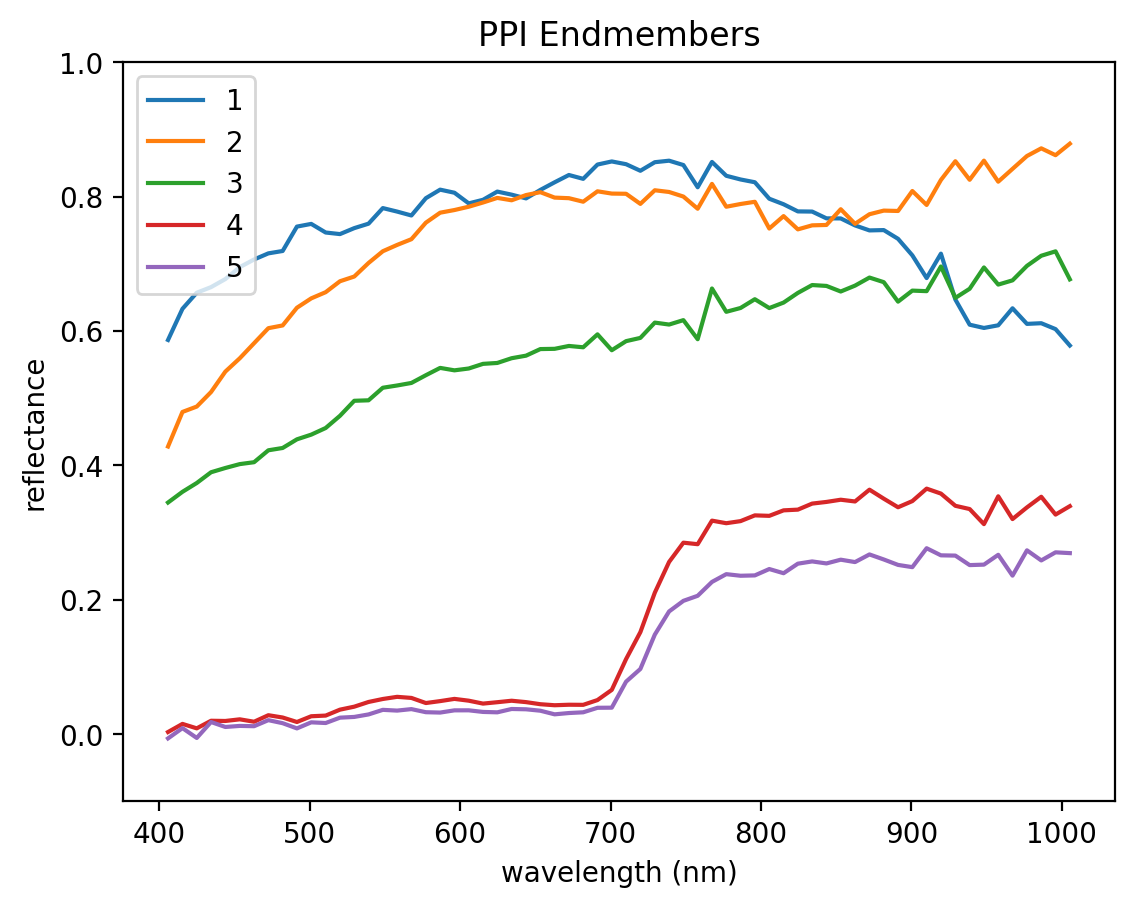

In [8]:
# trazar los endmembers que encontramos
plt.plot(wvl,E.T)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.legend([str(i+1) for i in range(q)], loc = 'upper left')
plt.ylim((-0.1,1))
plt.title("PPI Endmembers")

<font color='#4C5FDA'>**FCLS**</font>


Tras estimar los espectros de los miembros finales, podemos estimar las abundancias/proporciones de cada píxel de la imagen.  Para ello utilizaremos el algoritmo FCLS.  (Hay muchos algoritmos en la literatura que estiman proporciones dados los endmembers.  FCLS es sólo un ejemplo).

## <font color='#ECA702'>**Reto #2 💪**</font>
* Encontrar abundancias dados los endmembers
* Mostrar los mapas de abundancia en una gráfica


In [9]:
# encontrar abundancias dados los endmembers
maps = pysptools.abundance_maps.amaps.FCLS(M, E) #Esto funciona lentamente con grandes conjuntos de datos/más endmembers.

In [21]:
# Mostrar mapas de abundancia

map_imgs = []
for i in range(q):
    map_lin = np.zeros((n_r*n_c,))
    map_lin[valid_array] = maps[:,i]
    map_imgs.append(np.reshape(map_lin, (n_r, n_c)))

# Determine the number of rows and columns for the subplot grid
# This assumes you want to fit all plots in the minimum required number of rows
n_cols = 3  # Number of columns per row; adjust as needed
n_rows = (q + n_cols - 1) // n_cols  # Calculate rows needed, rounded up

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# If you have less plots than slots, this makes the unused axes invisible
for ax in axes.flat[len(map_imgs):]:
    ax.axis('off')

# Iterate over the number of maps and plot them
for i, ax in enumerate(axes.flat):
    if i < len(map_imgs):
        im = ax.imshow(map_imgs[i], vmin=0, vmax=1)
        fig.colorbar(im, ax=ax)
        ax.set_title(f'FCLS Abundance Map {i+1}')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

<font color='#4C5FDA'>**SPICE**</font>


Alternativamente, podemos estimar los endmembers, el número de endmembers y las abundancias simultáneamente utilizando el algoritmo SPICE.  SPICE también es aplicable a conjuntos de datos muy mezclados, ya que no supone que los espectros de los miembros finales puedan encontrarse en el conjunto de datos.  Por supuesto, éste es sólo un ejemplo de este tipo de algoritmo en la literatura.

El código Matlab para SPICE se puede encontrar aquí: <url>https://github.com/GatorSense/SPICE</url>

## <font color='#ECA702'>**Reto #3 💪**</font>
* Ejecutar el algoritmo SPICE para encontrar el número de endmembers, endmembers y abundancias simultáneamente



In [12]:
# ejecutar SPICE para encontrar el número de endmembers, endmembers y abundancias simultáneamente
# Ejercicio: Variar los parámetros SPICE (en params) para ver el efecto en la estimación de endmember y parámetros.

params = SPICEParameters()
inputData = M.T.astype(float)

In [13]:
# para ahorrar tiempo de procesamiento, reduzca el tamaño de los datos de entrada para procesar menos píxeles
dsData = inputData[:,::20]
dsData.shape

(64, 5347)

In [14]:
# ejecutar SPICE
[eM,dsP] = SPICE(dsData,params)

 
Change in Objective Function Value: inf
Minimum of Maximum Proportions: 0.9999999999995867
Number of Endmembers: 20
Iteration: 1
 
 
Change in Objective Function Value: 55.04811135944367
Minimum of Maximum Proportions: 7.747546672019379e-16
Number of Endmembers: 9
Iteration: 2
 
 
Change in Objective Function Value: 5.008609157267223
Minimum of Maximum Proportions: 7.366589935872129e-15
Number of Endmembers: 8
Iteration: 3
 
 
Change in Objective Function Value: 5.004684063170622
Minimum of Maximum Proportions: 1.948131305003055e-16
Number of Endmembers: 7
Iteration: 4
 
 
Change in Objective Function Value: 5.006605021703425
Minimum of Maximum Proportions: 2.095111730424013e-15
Number of Endmembers: 6
Iteration: 5
 
 
Change in Objective Function Value: 0.0017824851936296682
Minimum of Maximum Proportions: 0.22712685690988288
Number of Endmembers: 6
Iteration: 6
 
 
Change in Objective Function Value: 0.0016936239093112704
Minimum of Maximum Proportions: 0.2041663254649356
Number of

In [15]:
# Ahora que ya tenemos endmembers, descomponemos la matriz de datos completa en lugar de los datos de la muestra reducida.
P = unmix2(inputData,eM)
n_em = eM.shape[1]

Text(0.5, 1.0, 'SPICE Endmembers')

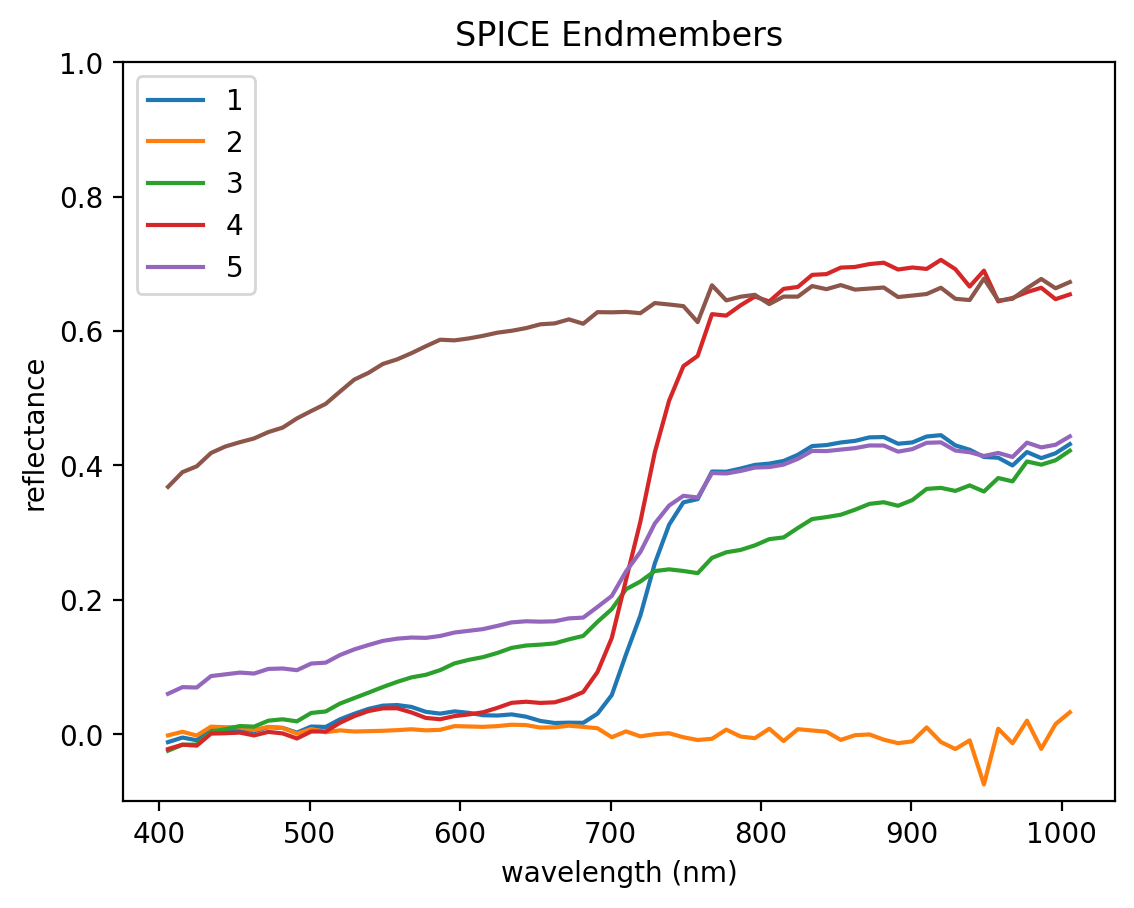

In [16]:
# Graficamos los endmembers
plt.plot(wvl,eM)
plt.xlabel('wavelength (nm)')
plt.ylabel('reflectance')
plt.legend([str(i+1) for i in range(q)], loc='upper left')
plt.ylim((-0.1,1))
plt.title('SPICE Endmembers')

In [17]:
# volver a trazar mapas de abundancia
P_imgs = []
for i in range(n_em):
    map_lin = np.zeros((n_r*n_c,))
    map_lin[valid_array] = P[:,i]
    P_imgs.append(np.reshape(map_lin,(n_r,n_c)))

In [26]:
P_imgs = []
for i in range(n_em):
    map_lin = np.zeros((n_r*n_c,))
    map_lin[valid_array] = P[:,i]
    P_imgs.append(np.reshape(map_lin, (n_r, n_c)))

# Determine the number of rows and columns for the subplot grid
# This assumes you want to fit all plots in the minimum required number of rows
n_cols = 3  # Number of columns per row; adjust as needed
n_rows = (q + n_cols - 1) // n_cols  # Calculate rows needed, rounded up

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

# If you have less plots than slots, this makes the unused axes invisible
for ax in axes.flat[len(P_imgs):]:
    ax.axis('off')

# Iterate over the number of maps and plot them
for i, ax in enumerate(axes.flat):
    if i < len(P_imgs):
        im = ax.imshow(P_imgs[i], vmin=0, vmax=1)
        fig.colorbar(im, ax=ax)
        ax.set_title(f'FCLS Abundance Map {i+1}')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.